In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow_addons as tfa
import os

DATA_DIR = "all_images_sets"
MODEL_PATH = "saved_models/AAB_ASS2_final.h5"
IMG_SIZE = (240, 240)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

class RandomBlackout(tf.keras.layers.Layer):
    def __init__(self, prob=0.25, min_size=20, max_size=100, **kwargs):
        super().__init__(**kwargs)
        self.prob = prob
        self.min_size = min_size
        self.max_size = max_size

    def call(self, images, training=False):
        if not training:
            return images

        img_height = tf.shape(images)[1]
        img_width = tf.shape(images)[2]

        def mask_image(image):
            should_mask = tf.less(tf.random.uniform([], 0, 1), self.prob)

            def apply():
                box_height = tf.random.uniform([], self.min_size, self.max_size + 1, dtype=tf.int32)
                box_width = tf.random.uniform([], self.min_size, self.max_size + 1, dtype=tf.int32)

                top = tf.random.uniform([], 0, img_height - box_height + 1, dtype=tf.int32)
                left = tf.random.uniform([], 0, img_width - box_width + 1, dtype=tf.int32)

                mask = tf.ones_like(image)
                y = tf.range(top, top + box_height)
                x = tf.range(left, left + box_width)
                yy, xx = tf.meshgrid(y, x, indexing='ij')
                indices = tf.stack([yy, xx], axis=-1)
                indices = tf.reshape(indices, (-1, 2))

                updates = tf.zeros((tf.shape(indices)[0], 3), dtype=mask.dtype)
                mask = tf.tensor_scatter_nd_update(mask, indices, updates)

                return image * mask

            return tf.cond(should_mask, apply, lambda: image)

        return tf.map_fn(mask_image, images)

data_augmentation = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    RandomBlackout(prob=0.25, min_size=20, max_size=100)
])

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "train"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "val"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "test"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)


C:\Users\guuss\anaconda3\envs\tf_env\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\guuss\anaconda3\envs\tf_env\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If 


Found 2642 files belonging to 12 classes.
Found 570 files belonging to 12 classes.
Found 574 files belonging to 12 classes.


### Code where we have deleted the random black sides of the images, since they have no meaning

Found 2642 files belonging to 12 classes.
Found 570 files belonging to 12 classes.
Found 574 files belonging to 12 classes.


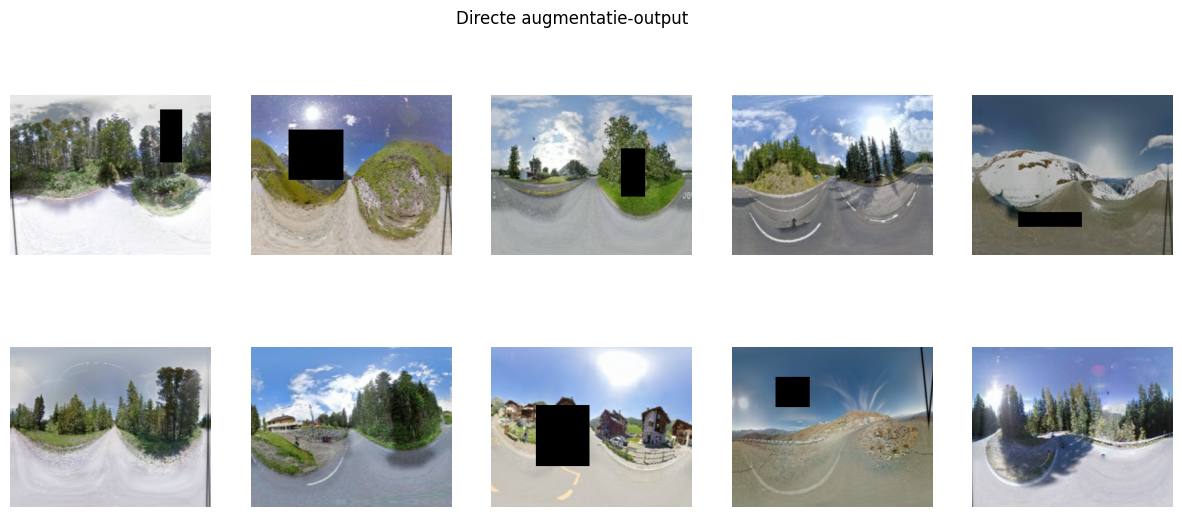

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow_addons as tfa
import os
import matplotlib.pyplot as plt
DATA_DIR = "all_images_sets_cropped"  # aangepast naar opgeschoonde set
MODEL_PATH = "saved_models/AAB_ASS2_final.h5"
IMG_SIZE = (240, 300)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

class RandomBlackout(tf.keras.layers.Layer):
    def __init__(self, prob=0.25, min_size=20, max_size=100, **kwargs):
        super().__init__(**kwargs)
        self.prob = prob
        self.min_size = min_size
        self.max_size = max_size

    def call(self, images, training=False):
        if not training:
            return images

        img_height = tf.shape(images)[1]
        img_width = tf.shape(images)[2]

        def mask_image(image):
            should_mask = tf.less(tf.random.uniform([], 0, 1), self.prob)

            def apply():
                box_height = tf.random.uniform([], self.min_size, self.max_size + 1, dtype=tf.int32)
                box_width = tf.random.uniform([], self.min_size, self.max_size + 1, dtype=tf.int32)
                top = tf.random.uniform([], 0, img_height - box_height + 1, dtype=tf.int32)
                left = tf.random.uniform([], 0, img_width - box_width + 1, dtype=tf.int32)

                mask = tf.ones_like(image)
                y = tf.range(top, top + box_height)
                x = tf.range(left, left + box_width)
                yy, xx = tf.meshgrid(y, x, indexing='ij')
                indices = tf.stack([yy, xx], axis=-1)
                indices = tf.reshape(indices, (-1, 2))

                updates = tf.zeros((tf.shape(indices)[0], 3), dtype=mask.dtype)
                mask = tf.tensor_scatter_nd_update(mask, indices, updates)
                return image * mask

            return tf.cond(should_mask, apply, lambda: image)

        return tf.map_fn(mask_image, images)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "train"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "val"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "test"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

data_augmentation = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(factor=7.5 / 360),  # 7.5 graden
    layers.RandomZoom(height_factor=0.10, width_factor=0.10),  # 7.5%
    RandomBlackout(prob=0.25, min_size=20, max_size=100)
])

for images, _ in train_ds.take(1):
    augmented = data_augmentation(images, training=True)
    plt.figure(figsize=(15, 6))
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow((augmented[i].numpy() * 255).astype("uint8"))
        plt.axis("off")
    plt.suptitle("Directe augmentatie-output")
    plt.show()
    break


train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

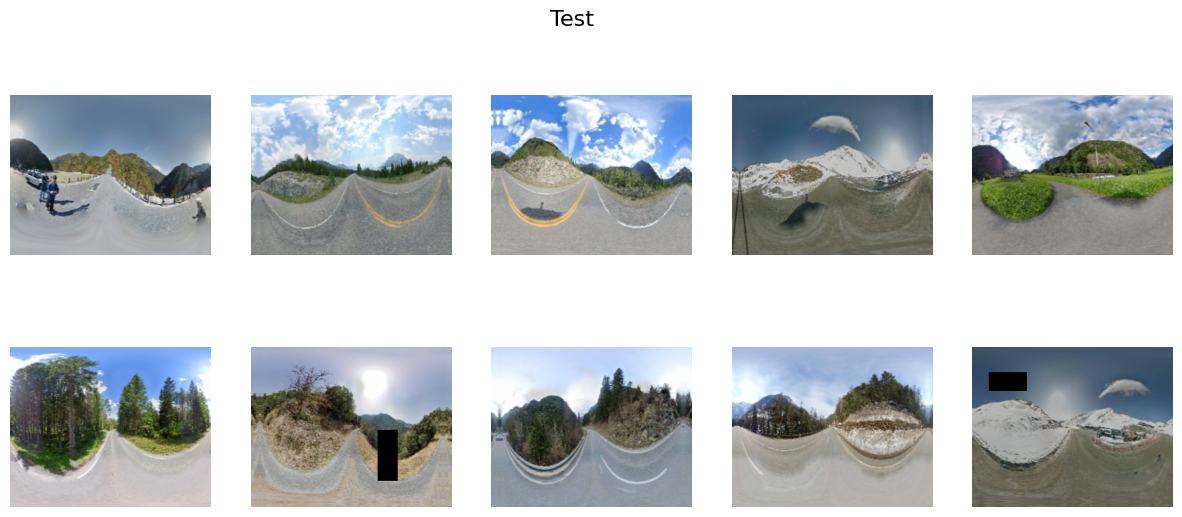

In [5]:
import matplotlib.pyplot as plt

for images, labels in train_ds.take(1):
    plt.figure(figsize=(15, 6))
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy())
        plt.axis("off")
    plt.suptitle("Test", fontsize=16)
    plt.show()

### Test printen MET bestandsnaam

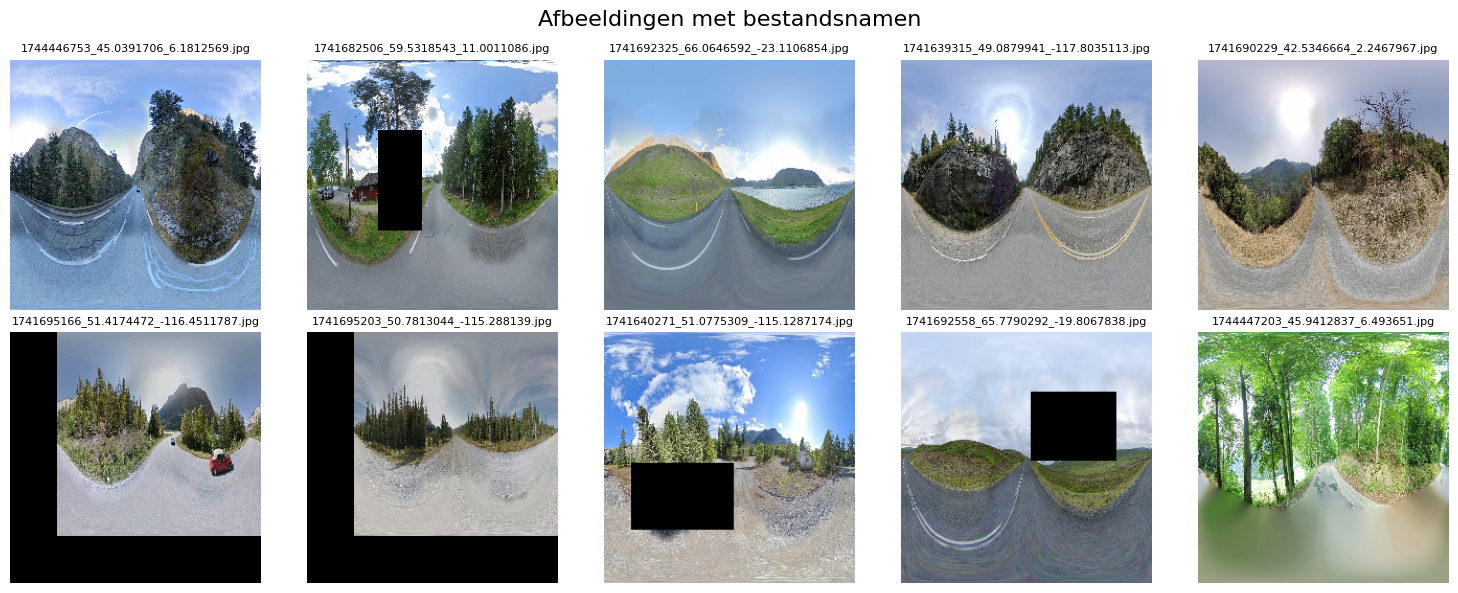

In [19]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os
import matplotlib.pyplot as plt

DATA_DIR = "all_images_sets"
IMG_SIZE = (240, 240)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

class RandomBlackout(tf.keras.layers.Layer):
    def __init__(self, prob=0.25, min_size=20, max_size=100, **kwargs):
        super().__init__(**kwargs)
        self.prob = prob
        self.min_size = min_size
        self.max_size = max_size

    def call(self, images, training=False):
        if not training:
            return images

        img_height = tf.shape(images)[1]
        img_width = tf.shape(images)[2]

        def mask_image(image):
            should_mask = tf.less(tf.random.uniform([], 0, 1), self.prob)

            def apply():
                box_height = tf.random.uniform([], self.min_size, self.max_size + 1, dtype=tf.int32)
                box_width = tf.random.uniform([], self.min_size, self.max_size + 1, dtype=tf.int32)

                top = tf.random.uniform([], 0, img_height - box_height + 1, dtype=tf.int32)
                left = tf.random.uniform([], 0, img_width - box_width + 1, dtype=tf.int32)

                mask = tf.ones_like(image)
                y = tf.range(top, top + box_height)
                x = tf.range(left, left + box_width)
                yy, xx = tf.meshgrid(y, x, indexing='ij')
                indices = tf.stack([yy, xx], axis=-1)
                indices = tf.reshape(indices, (-1, 2))

                updates = tf.zeros((tf.shape(indices)[0], 3), dtype=mask.dtype)
                mask = tf.tensor_scatter_nd_update(mask, indices, updates)

                return image * mask

            return tf.cond(should_mask, apply, lambda: image)

        return tf.map_fn(mask_image, images)

data_augmentation = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    RandomBlackout(prob=0.25, min_size=20, max_size=100)
])

def decode_img(filename):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    return img

def get_label(file_path, class_names):
    parts = tf.strings.split(file_path, os.path.sep)
    label_str = parts[-2]
    match_index = tf.where(tf.equal(class_names, label_str))[0][0]
    return tf.one_hot(match_index, depth=len(class_names))

def process_path(file_path, class_names):
    img = decode_img(file_path)
    label = get_label(file_path, class_names)
    return img, label, file_path

def prepare_dataset(split):
    file_paths = tf.data.Dataset.list_files(os.path.join(DATA_DIR, split, "*", "*"), shuffle=True)
    return file_paths.map(lambda x: process_path(x, tf.constant(class_names)), num_parallel_calls=AUTOTUNE)

class_names = np.array(sorted(os.listdir(os.path.join(DATA_DIR, "train"))))

train_ds = prepare_dataset("train").batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds = prepare_dataset("val").batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds = prepare_dataset("test").batch(BATCH_SIZE).prefetch(AUTOTUNE)

train_ds = train_ds.map(lambda x, y, z: (data_augmentation(x, training=True), y, z), num_parallel_calls=AUTOTUNE)

for images, labels, file_paths in train_ds.take(1):
    plt.figure(figsize=(15, 6))
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        img = (images[i].numpy() * 255).astype("uint8")
        plt.imshow(img)
        filename = file_paths[i].numpy().decode("utf-8").split(os.path.sep)[-1]
        plt.title(filename, fontsize=8)
        plt.axis("off")
    plt.suptitle("Afbeeldingen met bestandsnamen", fontsize=16)
    plt.tight_layout()
    plt.show()


Controleren waar de zwarte randen vandaan komen

In [24]:
import os

ROOT_DIR = "all_images_sets/train"  # Pas aan als je in 'val' of 'test' wil zoeken
FILENAME_TO_FIND = "1741695203_50.7813044_-115.288139.jpg"

found = False
for root, dirs, files in os.walk(ROOT_DIR):
    if FILENAME_TO_FIND in files:
        print(f"Gevonden in map: {root}")
        print(f"Volledig pad: {os.path.join(root, FILENAME_TO_FIND)}")
        found = True
        break

if not found:
    print("Bestand niet gevonden.")


Gevonden in map: all_images_sets/train\canada
Volledig pad: all_images_sets/train\canada\1741695203_50.7813044_-115.288139.jpg


### zwarte randen wegknippen met een threshold van 2 en een nieuwe dataset creeren

In [30]:
import os
import cv2
import numpy as np
from tqdm import tqdm

SOURCE_ROOT = "all_images_sets"
DEST_ROOT = "all_images_sets_cropped"
IMG_SIZE = (240, 240)
THRESHOLD = 2

def crop_black_borders(image, threshold=2):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    coords = cv2.findNonZero(mask)
    if coords is not None:
        x, y, w, h = cv2.boundingRect(coords)
        return image[y:y+h, x:x+w]
    else:
        return image

def process_dataset(split):
    source_dir = os.path.join(SOURCE_ROOT, split)
    dest_dir = os.path.join(DEST_ROOT, split)

    for class_name in os.listdir(source_dir):
        class_source = os.path.join(source_dir, class_name)
        class_dest = os.path.join(dest_dir, class_name)
        os.makedirs(class_dest, exist_ok=True)

        for fname in tqdm(os.listdir(class_source), desc=f"{split}/{class_name}"):
            src_path = os.path.join(class_source, fname)
            dst_path = os.path.join(class_dest, fname)

            try:
                img = cv2.imread(src_path)
                if img is None:
                    continue
                cropped = crop_black_borders(img, threshold=THRESHOLD)
                resized = cv2.resize(cropped, IMG_SIZE)
                cv2.imwrite(dst_path, resized)
            except Exception as e:
                print(f"Fout bij verwerken van {fname}: {e}")

for split in ["train", "val", "test"]:
    process_dataset(split)

print("✅ Alle afbeeldingen zijn verwerkt en opgeslagen.")


test/switzerland: 100%|████████████████████████████████████████████████████████████████| 60/60 [00:11<00:00,  5.03it/s]

✅ Alle afbeeldingen zijn verwerkt en opgeslagen.


### Volledig nieuw model trainen op zelfde manier als ons final model, maar dan met zwarte boxen

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import EfficientNetB1, efficientnet
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from sklearn.utils import class_weight
import numpy as np
import os

DATA_DIR = "all_images_sets_cropped"
IMG_SIZE = (240, 240)
BATCH_SIZE = 32
EPOCHS = 25
AUTOTUNE = tf.data.AUTOTUNE

class RandomBlackout(tf.keras.layers.Layer):
    def __init__(self, prob=0.25, min_size=20, max_size=100, **kwargs):
        super().__init__(**kwargs)
        self.prob = prob
        self.min_size = min_size
        self.max_size = max_size

    def call(self, images, training=False):
        if not training:
            return images

        img_height = tf.shape(images)[1]
        img_width = tf.shape(images)[2]

        def mask_image(image):
            should_mask = tf.less(tf.random.uniform([], 0, 1), self.prob)

            def apply():
                box_height = tf.random.uniform([], self.min_size, self.max_size + 1, dtype=tf.int32)
                box_width = tf.random.uniform([], self.min_size, self.max_size + 1, dtype=tf.int32)
                top = tf.random.uniform([], 0, img_height - box_height + 1, dtype=tf.int32)
                left = tf.random.uniform([], 0, img_width - box_width + 1, dtype=tf.int32)

                mask = tf.ones_like(image)
                y = tf.range(top, top + box_height)
                x = tf.range(left, left + box_width)
                yy, xx = tf.meshgrid(y, x, indexing='ij')
                indices = tf.stack([yy, xx], axis=-1)
                indices = tf.reshape(indices, (-1, 2))

                updates = tf.zeros((tf.shape(indices)[0], 3), dtype=mask.dtype)
                return tf.tensor_scatter_nd_update(image, indices, updates)

            return tf.cond(should_mask, apply, lambda: image)

        return tf.map_fn(mask_image, images)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomContrast(0.1),
    RandomBlackout(prob=0.25, min_size=20, max_size=100)
])

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "train"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "val"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "test"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

class_names = train_ds.class_names
num_classes = len(class_names)

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

train_labels = []
for _, labels in train_ds:
    train_labels.extend(np.argmax(labels.numpy(), axis=1))

weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(weights))

Found 2642 files belonging to 12 classes.
Found 570 files belonging to 12 classes.
Found 574 files belonging to 12 classes.


In [ ]:
base_model = EfficientNetB1(include_top=False, input_shape=IMG_SIZE + (3,), weights='imagenet')
base_model.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    class_weight=class_weights,
    callbacks=callbacks
)

model.save("saved_models/AAB_ASS2_b1_augmented_blackout.h5")

18/18 [==============================] - 21s 1s/step - loss: 1.0392 - accuracy: 0.6341

✅ Test accuracy: 0.6341
Test loss: 1.0392
1/1 [==============================] - 3s 3s/step


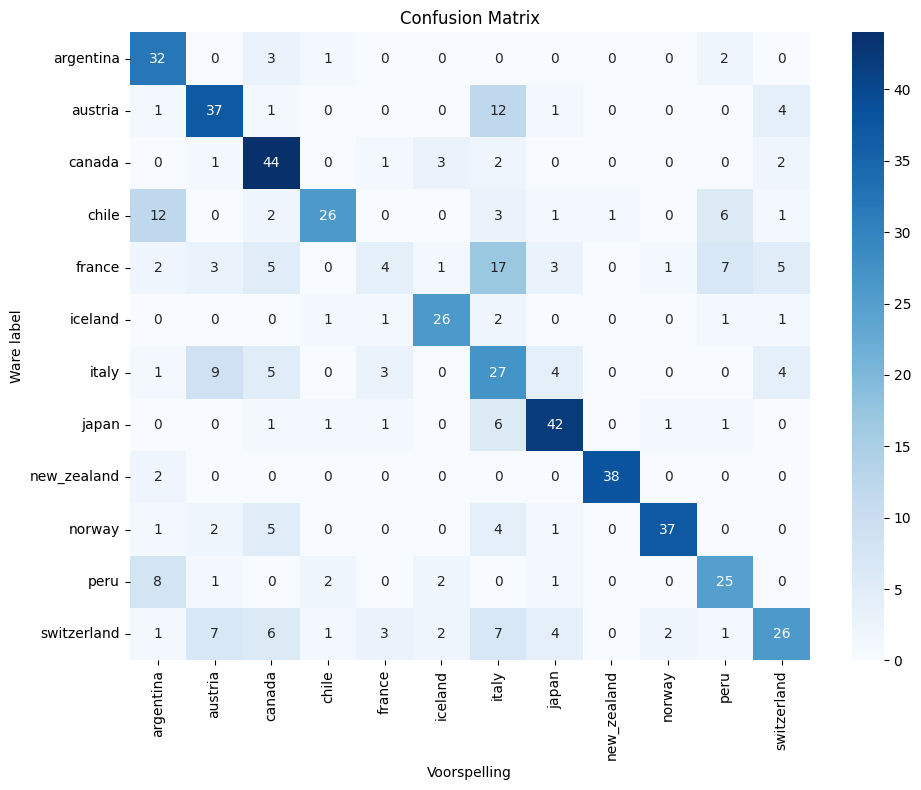


📊 Classification report:
              precision    recall  f1-score   support

   argentina       0.53      0.84      0.65        38
     austria       0.62      0.66      0.64        56
      canada       0.61      0.83      0.70        53
       chile       0.81      0.50      0.62        52
      france       0.31      0.08      0.13        48
     iceland       0.76      0.81      0.79        32
       italy       0.34      0.51      0.41        53
       japan       0.74      0.79      0.76        53
 new_zealand       0.97      0.95      0.96        40
      norway       0.90      0.74      0.81        50
        peru       0.58      0.64      0.61        39
 switzerland       0.60      0.43      0.50        60

    accuracy                           0.63       574
   macro avg       0.65      0.65      0.63       574
weighted avg       0.64      0.63      0.62       574



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

loss, accuracy = model.evaluate(test_ds)
print(f"\n✅ Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Voorspelling")
plt.ylabel("Ware label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

print("\n📊 Classification report:")
print(classification_report(y_true, y_pred, target_names=class_names))


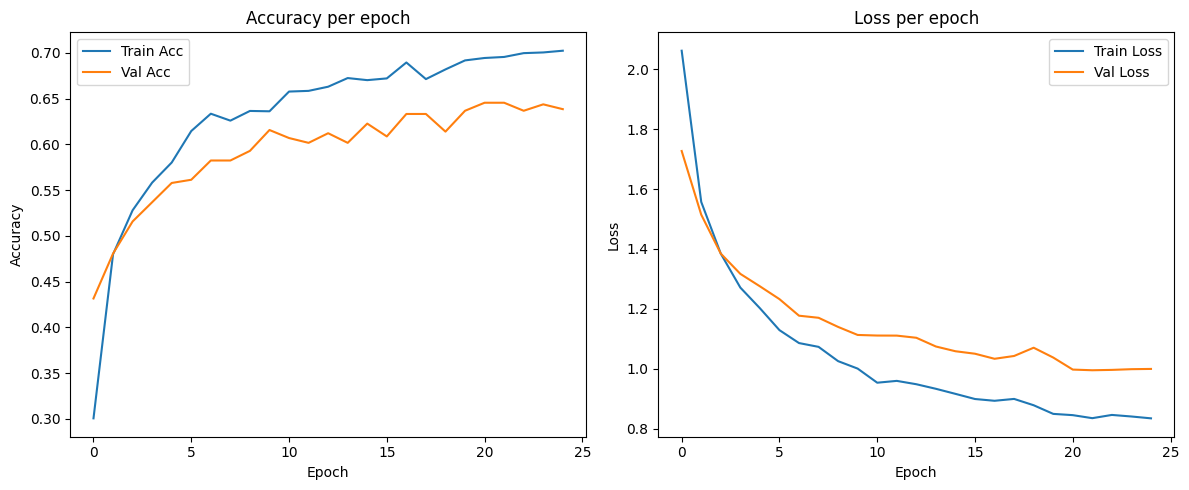

In [3]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy per epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


### Opslaan history van het model

In [5]:
np.savez("training_history_efficientnetb1.npz",
         accuracy=history.history['accuracy'],
         val_accuracy=history.history['val_accuracy'],
         loss=history.history['loss'],
         val_loss=history.history['val_loss'])

In [8]:
base_model = model.get_layer("efficientnetb1")  # Pas dit aan als nodig (controleren met model.summary())

base_model.trainable = True
fine_tune_at = len(base_model.layers) - 30
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
]

fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    class_weight=class_weights,
    callbacks=fine_tune_callbacks
)

model.save("saved_models/AAB_ASS2_b1_augmented_blackout_finetuned_last30.h5")


Epoch 1/10
83/83 [==============================] - 158s 2s/step - loss: 0.8154 - accuracy: 0.7116 - val_loss: 0.9881 - val_accuracy: 0.6386 - lr: 1.0000e-05
Epoch 2/10
83/83 [==============================] - 158s 2s/step - loss: 0.7906 - accuracy: 0.7078 - val_loss: 0.9725 - val_accuracy: 0.6404 - lr: 1.0000e-05
Epoch 3/10
83/83 [==============================] - 151s 2s/step - loss: 0.7930 - accuracy: 0.7127 - val_loss: 0.9676 - val_accuracy: 0.6509 - lr: 1.0000e-05
Epoch 4/10
83/83 [==============================] - 153s 2s/step - loss: 0.7864 - accuracy: 0.7131 - val_loss: 0.9737 - val_accuracy: 0.6456 - lr: 1.0000e-05
Epoch 5/10
83/83 [==============================] - 153s 2s/step - loss: 0.7571 - accuracy: 0.7245 - val_loss: 0.9619 - val_accuracy: 0.6491 - lr: 1.0000e-05
Epoch 6/10
83/83 [==============================] - 152s 2s/step - loss: 0.7534 - accuracy: 0.7207 - val_loss: 0.9518 - val_accuracy: 0.6649 - lr: 1.0000e-05
Epoch 7/10
83/83 [==============================] - 

C:\Users\guuss\anaconda3\envs\tf_env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
np.savez("training_history_efficientnetb1.npz",
         accuracy=history.history['accuracy'],
         val_accuracy=history.history['val_accuracy'],
         loss=history.history['loss'],
         val_loss=history.history['val_loss'])

In [5]:
model = tf.keras.models.load_model("saved_models/AAB_ASS2_b1_augmented_blackout_finetuned_last30.h5", compile=True)

ValueError: Unknown layer: 'RandomBlackout'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

loss, accuracy = model.evaluate(test_ds)
print(f"\n✅ Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Voorspelling")
plt.ylabel("Ware label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

print("\n📊 Classification report:")
print(classification_report(y_true, y_pred, target_names=class_names))

NameError: name 'model' is not defined